# 6.5 Unsupervised Machine Learning

1. Importing libraries and data
2. The elbow technique
3. k-means clustering

# 1. Import libraries and data

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [17]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [18]:
# Define path

path = r'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 6/Final Data Project/02 Data/Prepared Data'

In [19]:
path

'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 6/Final Data Project/02 Data/Prepared Data'

In [20]:
# Import most updated data

df = pd.read_csv(os.path.join(path, 'AB_US_2020_clean.csv'))

/var/folders/z2/5vq5z7g94w536gb5fb2v7sv40000gn/T/ipykernel_52284/2740001317.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'AB_US_2020_clean.csv'))


In [21]:
df.head()

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,0,38585,Charming Victorian home - twin beds + breakfast,165529,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,1,80905,French Chic Loft,427027,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,3,155305,Cottage! BonPaul + Sharky's Hostel,746673,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,4,160594,Historic Grove Park,769252,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


Data Cleaning

In [22]:
#check for mix type values
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

name
neighbourhood_group
last_review


In [23]:
# fix mix type value columns

df['name'] = df['name'].astype('str')
df['neighbourhood_group'] = df['neighbourhood_group'].astype('str')
df['last_review'] = df['last_review'].astype('str')

In [24]:
#check for mix type values
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
#no more mix type values

In [25]:
# drop Unnamed column

df = df.drop(columns = ['Unnamed: 0'])

In [26]:
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,nan,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,nan,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,nan,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,nan,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,nan,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [27]:
# Removing all columns except numerical ones
df2 = df.drop(columns =['id','name','host_id','neighbourhood_group','neighbourhood','room_type','last_review','city'])

In [28]:
df2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,35.65146,-82.62792,60,1,138,1.14,1,0
1,35.59779,-82.55540,470,1,114,1.03,11,288
2,35.60670,-82.55563,75,30,89,0.81,2,298
3,35.57864,-82.59578,90,1,267,2.39,5,0
4,35.61442,-82.54127,125,30,58,0.52,1,0


# 2. The elbow technique

In [29]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.


In [30]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.0000033516129884e+16,
 -79783960432.10088,
 -35669947139.68724,
 -23015169827.66658,
 -16441565330.37639,
 -11986494261.726957,
 -8535332599.829506,
 -6806457393.007904,
 -5916743868.35774]

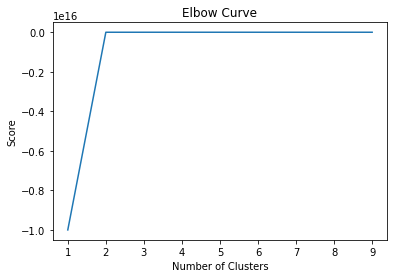

In [31]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In the elbow curve above, there is a sharp change at 2 as the line quickly flattens out, so our ideal cluster number will be 2

# 3. k-means Clustering

In [32]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2)

In [33]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=2)

In [34]:
df2['clusters'] = kmeans.fit_predict(df2)

In [35]:
df2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,clusters
0,35.65146,-82.62792,60,1,138,1.14,1,0,0
1,35.59779,-82.55540,470,1,114,1.03,11,288,0
2,35.60670,-82.55563,75,30,89,0.81,2,298,0
3,35.57864,-82.59578,90,1,267,2.39,5,0,0
4,35.61442,-82.54127,125,30,58,0.52,1,0,0


In [36]:
df2['clusters'].value_counts()

0    226029
1         1
Name: clusters, dtype: int64

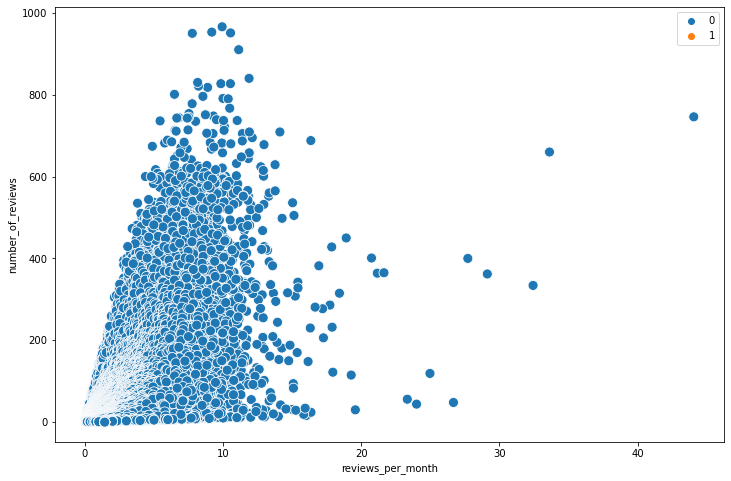

In [37]:
# Plot the clusters for the 'reviews_per_month' and 'number_of_reviews' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['reviews_per_month'], y=df['number_of_reviews'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('reviews_per_month') # Label x-axis.
plt.ylabel('number_of_reviews') # Label y-axis.
plt.show()

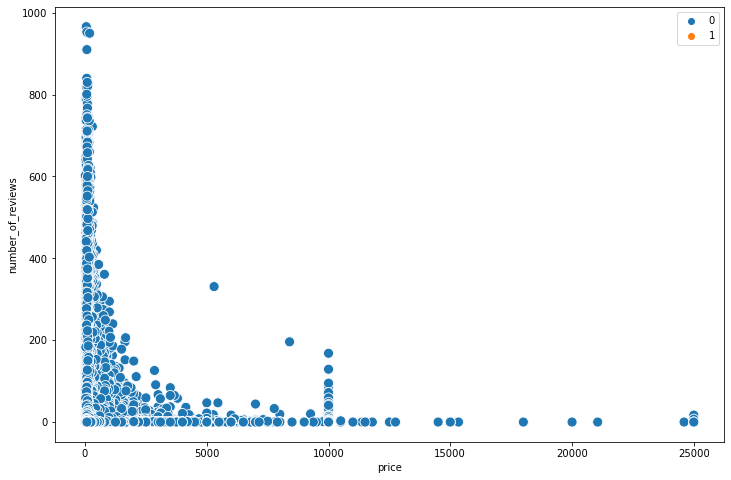

In [38]:
# Plot the clusters for the 'price' and 'number_of_reviews' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['price'], y=df['number_of_reviews'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('price') # Label x-axis.
plt.ylabel('number_of_reviews') # Label y-axis.
plt.show()

In [39]:
df2.loc[df2['clusters'] == 1, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

In [40]:
df2.groupby('cluster').agg({'price':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'], 
                         'availability_365':['mean', 'median'],
                          'minimum_nights':['mean', 'median']})

price        number_of_reviews        availability_365         \
                 mean median              mean median             mean median   
cluster                                                                         
dark purple   68.0000   68.0          8.000000    8.0         0.000000    0.0   
pink         219.7172  121.0         34.506647    8.0       159.315561  140.0   

            minimum_nights               
                      mean       median  
cluster                                  
dark purple   1.000000e+08  100000000.0  
pink          1.012987e+01          2.0

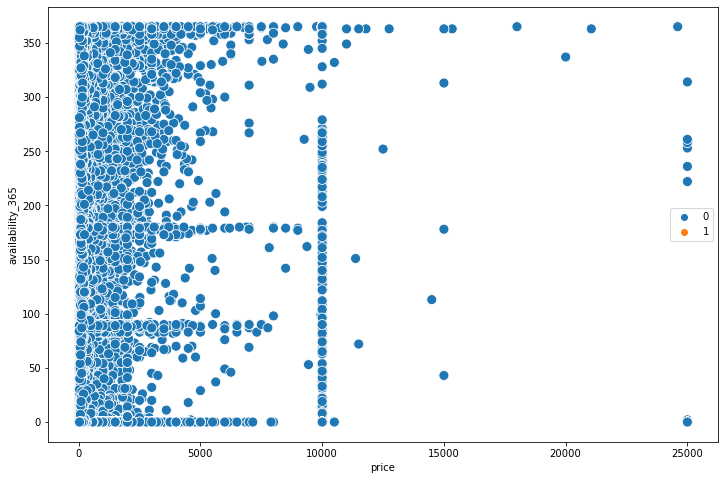

In [41]:
# price vs. availability

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['price'], y=df['availability_365'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('price') # Label x-axis.
plt.ylabel('availability_365') # Label y-axis.
plt.show()

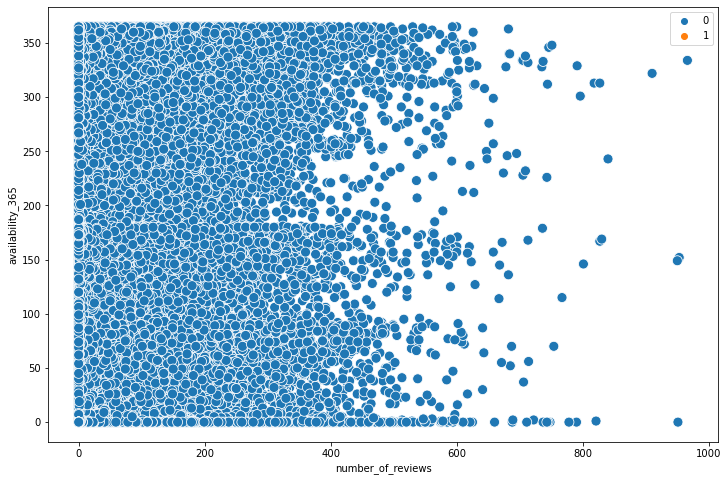

In [42]:
# Plot the clusters for the 'reviews_per_month' and 'number_of_reviews' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['number_of_reviews'], y=df['availability_365'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('number_of_reviews') # Label x-axis.
plt.ylabel('availability_365') # Label y-axis.
plt.show()